## Week 04

## Import required Packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # l

#### module to convert an address into latitude and longitude values

In [2]:
from geopy.geocoders import Nominatim

#### For Image Visulization

In [3]:
from IPython.display import Image 
from IPython.core.display import HTML 

#### tranforming json file into a pandas dataframe library

In [4]:
from pandas.io.json import json_normalize

In [5]:
import folium # plotting library

In [6]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response=requests.get(url)
html = response.text
page = BeautifulSoup(html,'html.parser')

In [7]:
wiki_table = page.body.table.tbody

#### definition for getting cell

In [8]:
def get_cell(element):
    cells = element.find_all('td')
    row = []
    
    for cell in cells:
        if cell.a:            
            if (cell.a.text):
                row.append(cell.a.text)
                continue
        row.append(cell.string.strip())
        
    return row

#### Definition for getting rows.

In [9]:
def get_row():    
    data = []  
    
    for tr in wiki_table.find_all('tr'):
        row = get_cell(tr)
        if len(row) != 3:
            continue
        data.append(row)        
    
    return data

In [10]:
rows = get_row()
columns_get = ['Postcode', 'Borough', 'Neighbourhood']
df = pd.DataFrame(rows, columns=columns_get)
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [11]:
df.shape

(288, 3)

#### Cleanning the data set

In [12]:
df=df[df.Borough != 'Not assigned']
df=df.sort_values(by=['Postcode','Borough'])
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,Rouge
1,M1B,Scarborough,Malvern
2,M1C,Scarborough,Highland Creek
3,M1C,Scarborough,Rouge Hill
4,M1C,Scarborough,Port Union


In [13]:
df_post = df['Postcode']
df_post.drop_duplicates(inplace=True)
#df_post
df_new = pd.DataFrame(df_post)
df_new['Borough'] = '';
df_new['Neighbourhood'] = '';

In [14]:
df_new.reset_index(inplace=True)
df_new.drop('index', axis=1, inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)


In [15]:
df_postcode = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df_postcode.head()
locgeo_df = pd.read_csv('https://cocl.us/Geospatial_data', index_col='Postal Code')
toronto_data = df_postcode.join(locgeo_df, on='Postcode')
toronto_data.drop('Postcode', axis=1, inplace=True)
toronto_data.shape

(103, 4)

In [16]:
df = pd.DataFrame(toronto_data)

In [17]:
df.to_csv('toronto_data.csv')

## Week 05 

In [18]:
import matplotlib.pyplot as plt

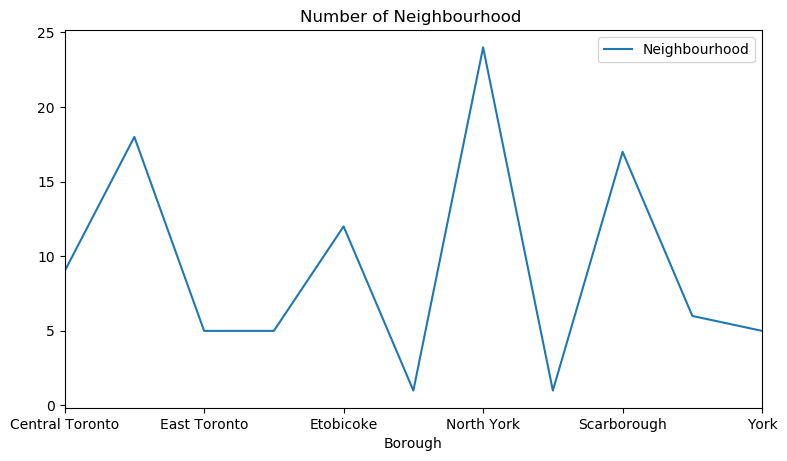

In [19]:

plt.figure(figsize=(9,5), dpi = 100)
plt.title('Number of Neighbourhood ')
toronto_data.groupby('Borough')['Neighbourhood'].count().plot(kind='line')
plt.legend()
plt.show()

### Client Id and Secret for the foursquare API

In [20]:
CLIENT_ID = 'DIFB4NBGW2Q52A52H00ZYIODEVAQQAVE1KY5UWIABBS2VGDB' # Dont See my ID
CLIENT_SECRET = 'ZZ5WA24J5JDKIUUN2RQGJF1EWHPXRPKABLFFUY1YCH23SICB' # Dont See my Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DIFB4NBGW2Q52A52H00ZYIODEVAQQAVE1KY5UWIABBS2VGDB
CLIENT_SECRET:ZZ5WA24J5JDKIUUN2RQGJF1EWHPXRPKABLFFUY1YCH23SICB


### Inputing Location Data

In [29]:
#address = input('Enter your address: ')
#address = '123 Queen St W, Toronto, CA'
#geolocator = Nominatim(user_agent="foursquare_agent")
#location = geolocator.geocode(address)
#latitude = location.latitude
latitude = 43.653908
longitude = -79.384293
#longitude = location.longitude
print(latitude, longitude)

43.653908 -79.384293


### search_query = 'Indian Resturants'

In [30]:
search_query = input('What type of food you want to eat? (Italian/Chinese/Indian etc.): ')

What type of food you want to eat? (Italian/Chinese/Indian etc.): Indian


In [31]:
radius = 500
print(search_query + ' .... OK!')
auth='https://api.foursquare.com/oauth2/authenticate?client_id=VQEMV3MW5RJ3JOJ2VFAUYG50KYQY5UEIEQBQVOCPMWFOSUOI'
auth

Indian .... OK!


'https://api.foursquare.com/oauth2/authenticate?client_id=VQEMV3MW5RJ3JOJ2VFAUYG50KYQY5UEIEQBQVOCPMWFOSUOI'

In [32]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

### Import Json

In [35]:
import json
results = requests.get(url).json()

###  assign relevant part of JSON to venues

In [37]:

venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4afd920ff964a520ad2822e3,181 Dundas St W,CA,Toronto,Canada,W of Chestnut St,232,"[181 Dundas St W (W of Chestnut St), Toronto O...","[{'label': 'display', 'lat': 43.65511996683289...",43.655120,-79.386645,M5G 1C7,ON,Indian Biriyani House,v-1561651578
1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4b2a634af964a52020a824e3,123 Dundas St W,CA,Toronto,Canada,btw Elizabeth & Bay,194,"[123 Dundas St W (btw Elizabeth & Bay), Toront...","[{'label': 'display', 'lat': 43.65564910619165...",43.655649,-79.384119,NaN,ON,Indian Flavour,v-1561651578
2,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,4fea497c121d2480d3579412,120 Adelaide Street West,CA,Toronto,Canada,at Bay Street,519,"[120 Adelaide Street West (at Bay Street), Tor...","[{'label': 'display', 'lat': 43.65005028051833...",43.650050,-79.380662,M5H 3V1,ON,Indian Biriyani House,v-1561651578
3,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",False,5165c333e4b07a7ad88d8a69,NaN,CA,NaN,Canada,NaN,520,[Canada],"[{'label': 'display', 'lat': 43.65814977325445...",43.658150,-79.381563,NaN,NaN,Joe's Indian Restaurant,v-1561651578
4,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",False,596f9dea1fa7632be2eacab9,NaN,CA,Toronto,Canada,NaN,364,"[Toronto ON M5G 2N2, Canada]","[{'label': 'display', 'lat': 43.65698561897954...",43.656986,-79.385840,M5G 2N2,ON,Mami's Indian Cuisine,v-1561651578


###   keep only columns that include venue name, and anything that is associated with location

In [39]:

filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Indian Biriyani House,Indian Restaurant,181 Dundas St W,CA,Toronto,Canada,W of Chestnut St,232,"[181 Dundas St W (W of Chestnut St), Toronto O...","[{'label': 'display', 'lat': 43.65511996683289...",43.655120,-79.386645,M5G 1C7,ON,4afd920ff964a520ad2822e3
1,Indian Flavour,Indian Restaurant,123 Dundas St W,CA,Toronto,Canada,btw Elizabeth & Bay,194,"[123 Dundas St W (btw Elizabeth & Bay), Toront...","[{'label': 'display', 'lat': 43.65564910619165...",43.655649,-79.384119,NaN,ON,4b2a634af964a52020a824e3
2,Indian Biriyani House,Indian Restaurant,120 Adelaide Street West,CA,Toronto,Canada,at Bay Street,519,"[120 Adelaide Street West (at Bay Street), Tor...","[{'label': 'display', 'lat': 43.65005028051833...",43.650050,-79.380662,M5H 3V1,ON,4fea497c121d2480d3579412
3,Joe's Indian Restaurant,Indian Restaurant,NaN,CA,NaN,Canada,NaN,520,[Canada],"[{'label': 'display', 'lat': 43.65814977325445...",43.658150,-79.381563,NaN,NaN,5165c333e4b07a7ad88d8a69
4,Mami's Indian Cuisine,Food Truck,NaN,CA,Toronto,Canada,NaN,364,"[Toronto ON M5G 2N2, Canada]","[{'label': 'display', 'lat': 43.65698561897954...",43.656986,-79.385840,M5G 2N2,ON,596f9dea1fa7632be2eacab9


In [41]:
dataframe_filtered.name

0      Indian Biriyani House
1             Indian Flavour
2      Indian Biriyani House
3    Joe's Indian Restaurant
4      Mami's Indian Cuisine
Name: name, dtype: object

In [ ]:
dataframe_filtered=dataframe_filtered.set_index(['id'])

In [44]:
for x in range(len(dataframe_filtered.index)):
    venue_id=dataframe_filtered.index[x]
    print(venue_id)
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        dataframe_filtered.loc[venue_id,'Rating']=result['response']['venue']['rating']
        #print(result['response']['venue']['rating'])
    except:
        dataframe_filtered.loc[venue_id,'Rating']=0
        #print('This venue has not been rated yet.')
    try:
        dataframe_filtered.loc[venue_id,'Pricing']=result['response']['venue']['price']['tier']
        #print(result['response']['venue']['rating'])
    except:
        dataframe_filtered.loc[venue_id,'Pricing']=0    
    try:
        dataframe_filtered.loc[venue_id,'Likes']=result['response']['venue']['likes']['count']
        #print(result['response']['venue']['rating'])
    except:
        dataframe_filtered.loc[venue_id,'Likes']=0
dataframe_filtered

4afd920ff964a520ad2822e3
4b2a634af964a52020a824e3
4fea497c121d2480d3579412
5165c333e4b07a7ad88d8a69
596f9dea1fa7632be2eacab9


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,Rating,Pricing,Likes
id,,,,,,,,,,,,,,,,,
4afd920ff964a520ad2822e3,Indian Biriyani House,Indian Restaurant,181 Dundas St W,CA,Toronto,Canada,W of Chestnut St,232,"[181 Dundas St W (W of Chestnut St), Toronto O...","[{'label': 'display', 'lat': 43.65511996683289...",43.655120,-79.386645,M5G 1C7,ON,7.0,2.0,5.0
4b2a634af964a52020a824e3,Indian Flavour,Indian Restaurant,123 Dundas St W,CA,Toronto,Canada,btw Elizabeth & Bay,194,"[123 Dundas St W (btw Elizabeth & Bay), Toront...","[{'label': 'display', 'lat': 43.65564910619165...",43.655649,-79.384119,NaN,ON,0.0,2.0,0.0
4fea497c121d2480d3579412,Indian Biriyani House,Indian Restaurant,120 Adelaide Street West,CA,Toronto,Canada,at Bay Street,519,"[120 Adelaide Street West (at Bay Street), Tor...","[{'label': 'display', 'lat': 43.65005028051833...",43.650050,-79.380662,M5H 3V1,ON,0.0,2.0,1.0
5165c333e4b07a7ad88d8a69,Joe's Indian Restaurant,Indian Restaurant,NaN,CA,NaN,Canada,NaN,520,[Canada],"[{'label': 'display', 'lat': 43.65814977325445...",43.658150,-79.381563,NaN,NaN,0.0,2.0,0.0
596f9dea1fa7632be2eacab9,Mami's Indian Cuisine,Food Truck,NaN,CA,Toronto,Canada,NaN,364,"[Toronto ON M5G 2N2, Canada]","[{'label': 'display', 'lat': 43.65698561897954...",43.656986,-79.385840,M5G 2N2,ON,0.0,1.0,0.0


#### Save it to a csv file

In [45]:
dataframe_filtered.to_csv('IndianResturants.csv')

In [46]:
indiandf = pd.read_csv("IndianResturants.csv")
indiandf

,id,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,Rating,Pricing,Likes
0,4afd920ff964a520ad2822e3,Indian Biriyani House,Indian Restaurant,181 Dundas St W,CA,Toronto,Canada,W of Chestnut St,232,"['181 Dundas St W (W of Chestnut St)', 'Toront...","[{'label': 'display', 'lat': 43.65511996683289...",43.655120,-79.386645,M5G 1C7,ON,7.0,2.0,5.0
1,4b2a634af964a52020a824e3,Indian Flavour,Indian Restaurant,123 Dundas St W,CA,Toronto,Canada,btw Elizabeth & Bay,194,"['123 Dundas St W (btw Elizabeth & Bay)', 'Tor...","[{'label': 'display', 'lat': 43.65564910619165...",43.655649,-79.384119,NaN,ON,0.0,2.0,0.0
2,4fea497c121d2480d3579412,Indian Biriyani House,Indian Restaurant,120 Adelaide Street West,CA,Toronto,Canada,at Bay Street,519,"['120 Adelaide Street West (at Bay Street)', '...","[{'label': 'display', 'lat': 43.65005028051833...",43.650050,-79.380662,M5H 3V1,ON,0.0,2.0,1.0
3,5165c333e4b07a7ad88d8a69,Joe's Indian Restaurant,Indian Restaurant,NaN,CA,NaN,Canada,NaN,520,['Canada'],"[{'label': 'display', 'lat': 43.65814977325445...",43.658150,-79.381563,NaN,NaN,0.0,2.0,0.0
4,596f9dea1fa7632be2eacab9,Mami's Indian Cuisine,Food Truck,NaN,CA,Toronto,Canada,NaN,364,"['Toronto ON M5G 2N2', 'Canada']","[{'label': 'display', 'lat': 43.65698561897954...",43.656986,-79.385840,M5G 2N2,ON,0.0,1.0,0.0


In [48]:
indiandf=indiandf.sort_values(by=['Likes'], ascending=False)
indiandf.head()

,id,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,Rating,Pricing,Likes
0,4afd920ff964a520ad2822e3,Indian Biriyani House,Indian Restaurant,181 Dundas St W,CA,Toronto,Canada,W of Chestnut St,232,"['181 Dundas St W (W of Chestnut St)', 'Toront...","[{'label': 'display', 'lat': 43.65511996683289...",43.655120,-79.386645,M5G 1C7,ON,7.0,2.0,5.0
2,4fea497c121d2480d3579412,Indian Biriyani House,Indian Restaurant,120 Adelaide Street West,CA,Toronto,Canada,at Bay Street,519,"['120 Adelaide Street West (at Bay Street)', '...","[{'label': 'display', 'lat': 43.65005028051833...",43.650050,-79.380662,M5H 3V1,ON,0.0,2.0,1.0
1,4b2a634af964a52020a824e3,Indian Flavour,Indian Restaurant,123 Dundas St W,CA,Toronto,Canada,btw Elizabeth & Bay,194,"['123 Dundas St W (btw Elizabeth & Bay)', 'Tor...","[{'label': 'display', 'lat': 43.65564910619165...",43.655649,-79.384119,NaN,ON,0.0,2.0,0.0
3,5165c333e4b07a7ad88d8a69,Joe's Indian Restaurant,Indian Restaurant,NaN,CA,NaN,Canada,NaN,520,['Canada'],"[{'label': 'display', 'lat': 43.65814977325445...",43.658150,-79.381563,NaN,NaN,0.0,2.0,0.0
4,596f9dea1fa7632be2eacab9,Mami's Indian Cuisine,Food Truck,NaN,CA,Toronto,Canada,NaN,364,"['Toronto ON M5G 2N2', 'Canada']","[{'label': 'display', 'lat': 43.65698561897954...",43.656986,-79.385840,M5G 2N2,ON,0.0,1.0,0.0


In [49]:
indiandf[['name','lat','lng','categories','Rating','Pricing','Likes','distance']]

,name,lat,lng,categories,Rating,Pricing,Likes,distance
0,Indian Biriyani House,43.655120,-79.386645,Indian Restaurant,7.0,2.0,5.0,232
2,Indian Biriyani House,43.650050,-79.380662,Indian Restaurant,0.0,2.0,1.0,519
1,Indian Flavour,43.655649,-79.384119,Indian Restaurant,0.0,2.0,0.0,194
3,Joe's Indian Restaurant,43.658150,-79.381563,Indian Restaurant,0.0,2.0,0.0,520
4,Mami's Indian Cuisine,43.656986,-79.385840,Food Truck,0.0,1.0,0.0,364


In [50]:
indiandf['Rating'].max()

7.0

#### The Maximum Rating is 7.0 and is for Indian Biriyanu House

In [53]:
indiandf1=indiandf.groupby('name',as_index=False).mean()[['name','Rating']]
indiandf1.columns=['Name','Average Rating']
indiandf1

,Name,Average Rating
0,Indian Biriyani House,3.5
1,Indian Flavour,0.0
2,Joe's Indian Restaurant,0.0
3,Mami's Indian Cuisine,0.0


In [55]:
indiandf1.sort_values(['Average Rating'],ascending=False).head()

,Name,Average Rating
0,Indian Biriyani House,3.5
1,Indian Flavour,0.0
2,Joe's Indian Restaurant,0.0
3,Mami's Indian Cuisine,0.0


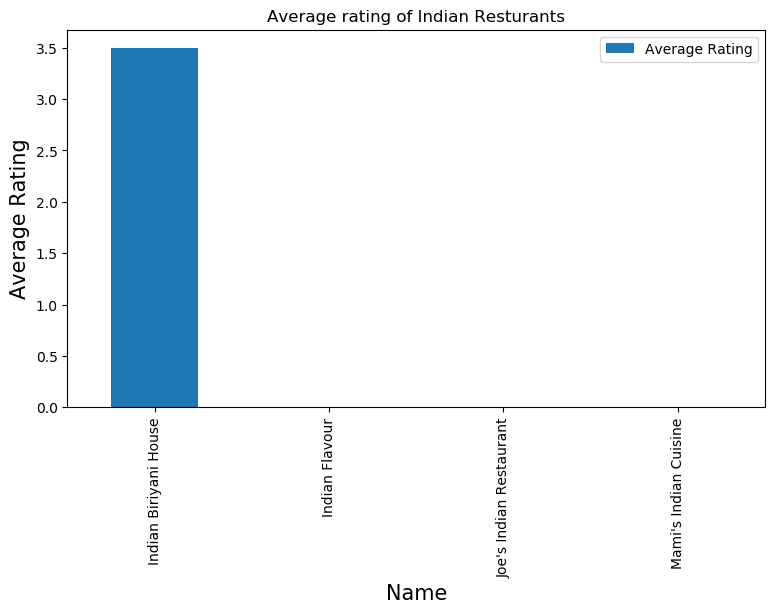

In [57]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Indian Resturants')
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
indiandf1.groupby('Name').mean()['Average Rating'].plot(kind='bar')
plt.legend()
plt.show()

In [59]:
def color(avg): 
    if avg >= 5:
        col ='Green'
    elif 3 <= avg < 5: 
        col = 'yellow'
    else: 
        col='blue'
    return col 


In [60]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel


In [62]:
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label,avg in zip(indiandf.lat, indiandf.lng, indiandf.categories,indiandf.Rating):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color=color(avg),
        popup=label,
        fill = True,
        #fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

In [63]:
venues_map